# School Matcher Graph Demo

This notebook demonstrates using the SchoolMatch AI project with LangGraph.

## 1. Setup and Imports

In [1]:
# Import necessary libraries
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate 
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import StateGraph, START, END, Graph
from langgraph.graph.message import add_messages
from typing import Annotated, TypedDict

from langchain_app.school_matcher_graph import (
    create_school_matcher_graph, run_school_matcher, create_graph_config
)
from db.college_vector_store import CollegeVectorStore

## 2. Initialize Components

In [2]:
# Enable LangSmith tracing (optional)
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "schoolmatch-ai" 

In [3]:
# Initialize the vector store
vector_store = CollegeVectorStore()

# Create the graph
graph = create_school_matcher_graph(vector_store)

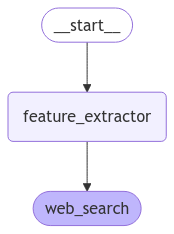

In [4]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

## 3. Run School Matcher

In [5]:
# Run the graph with a sample university
school_name = "Seattle University"

config = create_graph_config()
result = run_school_matcher(graph, school_name, config)

Error in web search: string indices must be integers, not 'str'


In [6]:
graph.get_state(config).values

{'messages': [AIMessage(content="**Key M&A-relevant Features of Seattle University:**\n\n1. **Financial:**\n   - Assets: Information not available\n   - Endowment: Information not available\n   - Revenue Streams: Tuition fees, donations, grants\n   - Debt: Information not available\n\n2. **Academic:**\n   - Programs: Master's degrees, Doctoral degrees\n   - Degrees: Master's degrees, Doctoral degrees\n   - Unique Offerings: Distance education courses\n\n3. **Market:**\n   - Location: Seattle, WA\n   - Tuition Costs: In-state and out-of-state tuition both at $53,235.00\n   - Online Capabilities: Distance education courses offered\n\n4. **Culture:**\n   - Mission: Information not available\n   - Values: Information not available\n   - History: Information not available\n\n5. **Demographics:**\n   - Race/Ethnicity: Information not available\n   - Gender: Information not available\n\n6. **Technology:**\n   - Infrastructure: Information not available\n   - Online Capabilities: Distance educ